In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
filename = "./data/AMZNtrain.csv"

In [2]:
data = pd.read_csv(filename)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2014,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,1/3/2014,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,1/6/2014,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,1/7/2014,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,1/8/2014,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
dateheader = 'Date'

In [5]:
x = data[dateheader]

In [6]:
date_objects = [datetime.strptime(x, '%m/%d/%Y').date() for x in x]

In [7]:
def subplot_(X,Y,i,j,title,xlabel,ylabel,label,ax_arr,color='b'):
    ax_arr[i,j].plot(X, Y, color, label = label)
# ax_arr[0,i]jplot([0, 1], [0, 1],'r--')
    ax_arr[i,j].set_title(title,fontsize=20)
    ax_arr[i,j].set_ylabel(ylabel,fontsize=20)
    ax_arr[i,j].set_xlabel(xlabel,fontsize=15)
    ax_arr[i,j].legend(loc = 'best', prop={'size': 16})
#     return ax_arr

In [8]:
list(set(data.columns).difference(set(dateheader)))

['Low', 'Adj Close', 'Open', 'Volume', 'Close', 'Date', 'High']

In [9]:
headings = []
for i in data.columns:
    if i != dateheader:
        headings.append(i)
    

In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

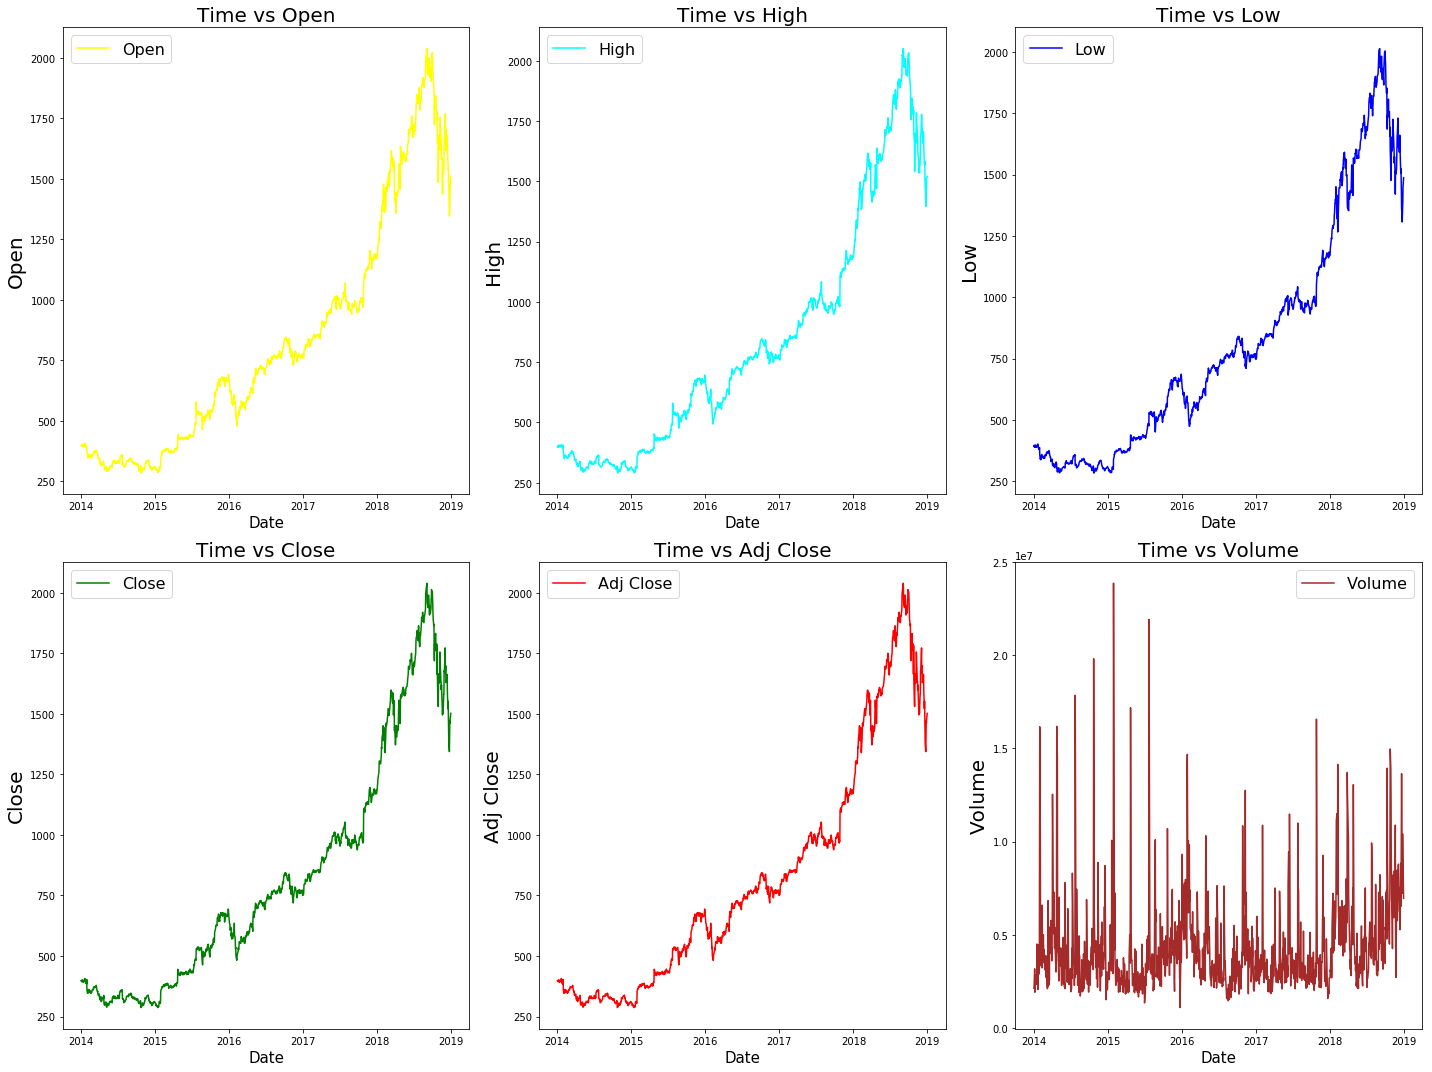

In [11]:
# headings = ['Close', 'Adj Close', 'High', 'Volume', 'Low', 'Open']
index = 0
colors = ['yellow','cyan','blue','green','red','brown']
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
for row in range(0,2):
    for col in range(0,3):
        subplot_(X=date_objects,Y=data[headings[index]],i=row,j=col,title="Time vs " +headings[index],
                 xlabel="Date",ylabel=headings[index],label=headings[index],ax_arr=ax_arr,color=colors[index])
        index+=1
        if(index >= len(headings)):
            break
    if(index >= len(headings)):
        break
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

In [12]:
from pandas.plotting import lag_plot,autocorrelation_plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
data_2 = pd.read_csv(filename,header=0,index_col=0)

In [13]:
# lag_plot(data_2)

In [14]:
# autocorrelation_plot(data_2)

In [15]:
# data_2.columns

In [23]:
from statsmodels.tsa.stattools import kpss

for i in headings:
        print("Testing for the feature : "+str(i))
        X = data_2[i]
        test = kpss(X)
        output = pd.Series(test[0:3], index=['Test Statistic','p-value','Number of Lags Used'])
        for key,value in test[3].items():
            output['critical value (%s)'%key] = value
        print (output)

Testing for the feature : Open
Test Statistic            4.722426
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : High
Test Statistic            4.718109
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : Low
Test Statistic            4.729707
p-value                   0.010000
Number of Lags Used      23.000000
critical value (10%)      0.347000
critical value (5%)       0.463000
critical value (2.5%)     0.574000
critical value (1%)       0.739000
dtype: float64
Testing for the feature : Close
Test Statistic            4.725171
p-value                   0.010000
Number of Lags Used      2

In [22]:
from statsmodels.tsa.arima_model import ARMA

def arma_model_fit(X):
    model = ARMA(X,order =(7,1))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    forecast = model_fit.forecast(steps=7)[0]
    for i in range(len(forecast)):
        print('Day %d: %f' % ((i+1), forecast[i]))    
    
for i in headings:
        print("Model fit and forecast : "+str(i))
#         model_fit = 
        arma_model_fit(data_2[i])
        print ("Predictability of %s values for next 7 days : " % str(i))
#         forecast(model_fit)

Model fit and forecast : Open
                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                 1258
Model:                     ARMA(7, 1)   Log Likelihood               -5565.965
Method:                       css-mle   S.D. of innovations             20.143
Date:                Mon, 28 Oct 2019   AIC                          11151.930
Time:                        22:11:31   BIC                          11203.303
Sample:                             0   HQIC                         11171.237
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        824.3409    496.413      1.661      0.097    -148.611    1797.293
ar.L1.Open     1.6143      0.002    648.160      0.000       1.609       1.619
ar.L2.Open    -0.5478 

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1258
Model:                     ARMA(7, 1)   Log Likelihood               -5482.063
Method:                       css-mle   S.D. of innovations             18.843
Date:                Mon, 28 Oct 2019   AIC                          10984.127
Time:                        22:11:47   BIC                          11035.499
Sample:                             0   HQIC                         11003.433
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         824.6618    495.590      1.664      0.096    -146.677    1796.000
ar.L1.Close     1.6900      0.002    766.266      0.000       1.686       1.694
ar.L2.Close    -0.6706      0.006   -121.180    

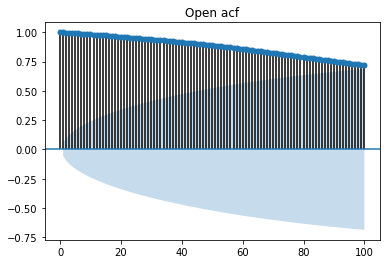

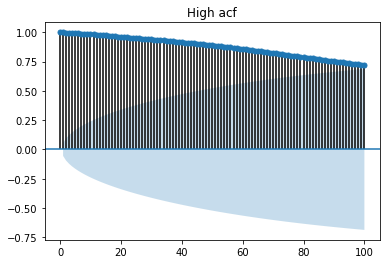

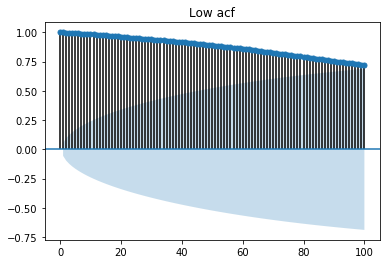

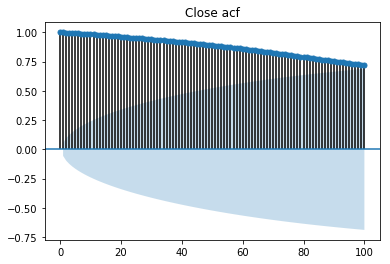

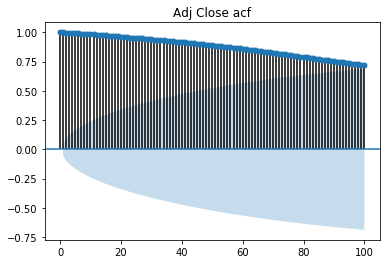

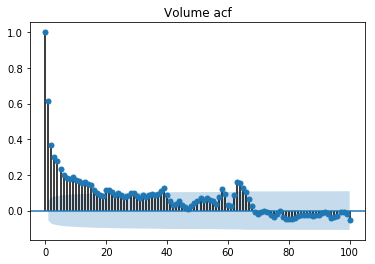

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
lags = 100
for i in headings:
    plot_acf(data_2[i],title=i+ " acf",lags=lags)

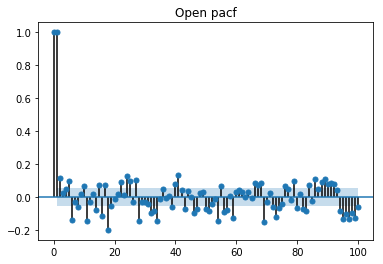

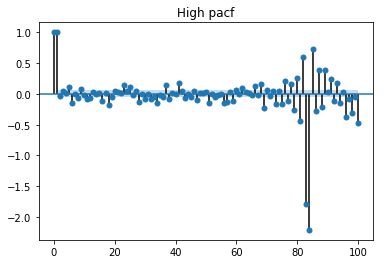

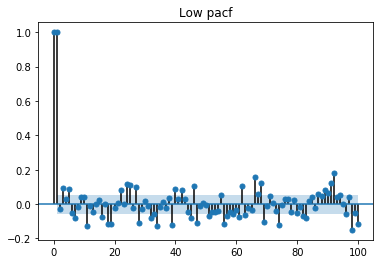

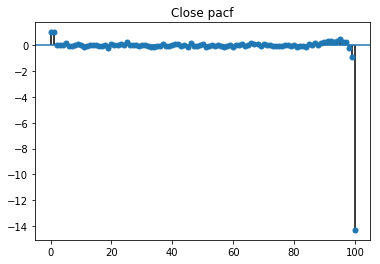

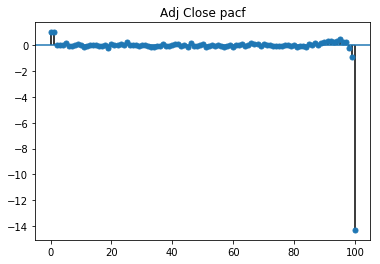

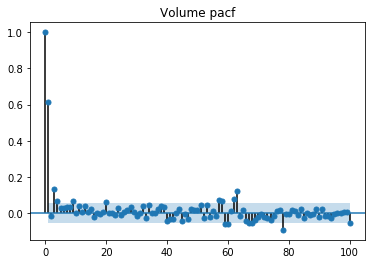

In [19]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for i in headings:
    plot_pacf(data_2[i],title=i + " pacf",lags=lags)